# Codecademy Portflio Project: Life Expectancy and GDP

### Project Goal: 
Analyze data on GDP and life expectancy at birth (LEB) from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.  

### Questions I look to answer:  
* What is the average life expectancy over time for each country? Are there any outliers/countries with noticeably lower/higher life expectancies?
* What is the average GDP over time for each country? Again, are there any clear outliers seen in this data?
* Is there a common trend in the length of life expectancy over the observed years? Do all countries follow this trend or do some countries present with a decrease in life expectancy while others see an increase?
* Is there a common trend in GDP over time? Do all countries trend the same way or will we notice GDP decline in some countries correspond with an increase in others?
* During the time between 2000 - 2015 are there any years of noteable change when compared to others? This time period happens to include the 2007-2008 U.S. mortgage crisis and subsequent Great Recession. How does this impact GDP and Life Expectancy for the United States? Other countries?
* Is there a clear relationship between GDP and life expectancy, and if so is that a positive or negatve one? If GDP does impact life expectancy, is the relationship linear? Is there a point in which a GDP increase stops impacting life expectancy? 

### 1 Setting things up  

Importing needed libraries and modules

In [81]:
#Import needed libraries
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm, ListedColormap, LogNorm

### 2 Reviewing the Data

#### 2.1 Initial Inspection

In [82]:
#Import/load data set and review them
df = pd.read_csv("all_data.csv")
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


At a glance, there is data on the average life expectancy and GDP by year for each country. Let's look into the data more and see what types were are working with and if there are any obvious discrepancies. 

In [83]:
df.info()
df.Country.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

#### What are we looking at?

* The dataset is broken up into 4 columns: "Country", "Year", "Life expectancy at birth (years)", and "GDP".   
* The non-null counts are the same for each column at 96. The "Country" column consists of object type (string), "Year" consists of integers (int64) and both GDP and Life expectancy at birth consist of floats (float64).  
* The dataset provides data for the countries: Chile, China, Germany, Mexico, United States of America, and Zimbabwe. 

In [84]:
#renaming the "United States of America" column as "USA" for ease of use and clarity on visuals.
df.Country = df.Country.replace({"United States of America": "USA"})

In [85]:
df.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [86]:
df.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

### Interpretation

* This dataset includes data from the years 2000 - 2015.
* The average life expectancy across all countries is about 72.8 years.
* The minimum life expectancy across all countries is 44.3 years.
* The maximum life expectancy across all countries is 81 years.
* The average GDP across all countries is 3.88 trillion dollars.
* The minimum GDP across all countries is about 4.4 billion dollars.
* The maximum GDP across all countries is about 18.1 trillion dollars.
* The median GDP (50%) is noticeably lower than the average, indicating that there are likely some outliers that must be accounted for that are heavily skewing the data.

After initial review, there does not seem to be any major issues or out-of-the-ordinary values in the dataset, so I will consider this dataset to be relatively "clean". That said, I want to do some cleaning up before digging into further analysis.

#### 2.2 Some Data Cleaning

In [87]:
#shortening the life expectancy column to LEB for ease of use
df.rename(columns = {"Life expectancy at birth (years)": "LEB"}, inplace = True)
df.columns

Index(['Country', 'Year', 'LEB', 'GDP'], dtype='object')

In [88]:
# dividing the gdp column by 1 billion in order to make numbers more manageable
df.GDP = df.GDP.apply(lambda x: x/1e+9)
df.GDP.describe()

count       96.000000
mean      3880.498571
std       5197.561311
min          4.415703
25%        173.301750
50%       1280.220000
75%       4067.510000
max      18100.000000
Name: GDP, dtype: float64

In [89]:
#Creating a "year_date" column in datetime format for 
df["year_date"] = pd.to_datetime(df["Year"], format="%Y")

In [90]:
#checking new column
df.year_date

0    2000-01-01
1    2001-01-01
2    2002-01-01
3    2003-01-01
4    2004-01-01
        ...    
91   2011-01-01
92   2012-01-01
93   2013-01-01
94   2014-01-01
95   2015-01-01
Name: year_date, Length: 96, dtype: datetime64[ns]

### 3 Data Analysis

#### 3.1 Creating some useful dataframes 

Having dataframes grouped by year and country as well as one with the averages will be helpful as I analyize and vizualize the data.

In [91]:
#Creating a new dataframe that is grouped by year (aggregated as mean values)
df_group_by_year = df.groupby(df.year_date).mean(numeric_only=True)
df_group_by_year

,Year,LEB,GDP
year_date,,,
2000-01-01,2000.0,70.766667,2371.583148
2001-01-01,2001.0,70.833333,2448.751885
2002-01-01,2002.0,70.950000,2561.221488
2003-01-01,2003.0,71.033333,2743.445842
2004-01-01,2004.0,71.300000,2991.647332
2005-01-01,2005.0,71.483333,3207.074369
2006-01-01,2006.0,71.950000,3463.348816
2007-01-01,2007.0,72.300000,3785.749658
2008-01-01,2008.0,72.666667,4055.985617


In [92]:
#Creating another new dataframe that is grouped by country
df_group_by_country = df.groupby(df.Country).mean(numeric_only=True)
df_group_by_country

,Year,LEB,GDP
Country,,,
Chile,2007.5,78.94375,169.788845
China,2007.5,74.26250,4957.713750
Germany,2007.5,79.65625,3094.775625
Mexico,2007.5,75.71875,976.650625
USA,2007.5,78.06250,14075.000000
Zimbabwe,2007.5,50.09375,9.062580


In [93]:
#Creating a dataframe of means
dfMeans = df.drop("Year", axis=1).groupby("Country").mean(numeric_only=True).reset_index()
dfMeans


,Country,LEB,GDP
0,Chile,78.94375,169.788845
1,China,74.26250,4957.713750
2,Germany,79.65625,3094.775625
3,Mexico,75.71875,976.650625
4,USA,78.06250,14075.000000
5,Zimbabwe,50.09375,9.062580


#### 3.2 Change in Life Expectancy at Birth (LEB) from 2000 - 2015

<Figure size 1000x800 with 0 Axes>

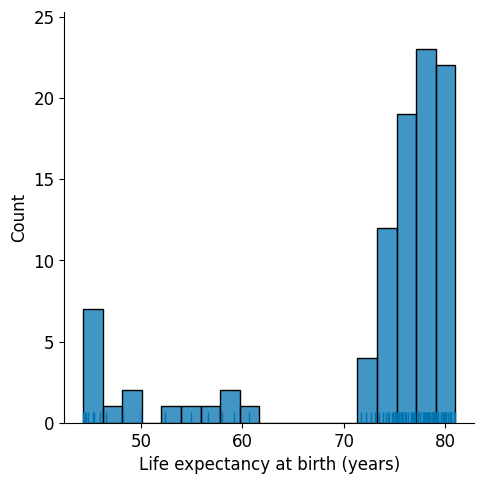

In [94]:
#Distribution of LEB
plt.figure(figsize=(10,8))
sns.displot(df.LEB, rug = True, kde=False, color = sns.color_palette("colorblind")[0])
plt.xlabel("Life expectancy at birth (years)");

The above shows that the life expectancy is pretty clearly skewed to the left.

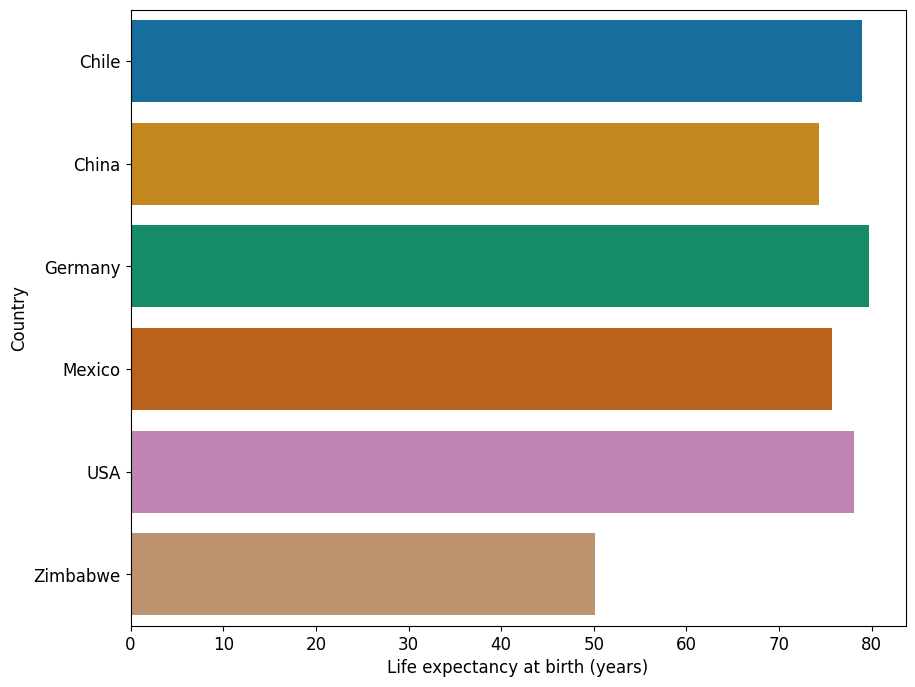

In [95]:
#Mean LEB by country
plt.figure(figsize=(10,8))
sns.barplot(x="LEB", y="Country", data=dfMeans, palette= 'colorblind')
plt.xlabel("Life expectancy at birth (years)");

Zimbabwe has a noticeably lower average life expectancy at birth than the other countries. Further analysis will show if this holds true across all years or if this lower average is do to 1 or 2 particularly bad years.

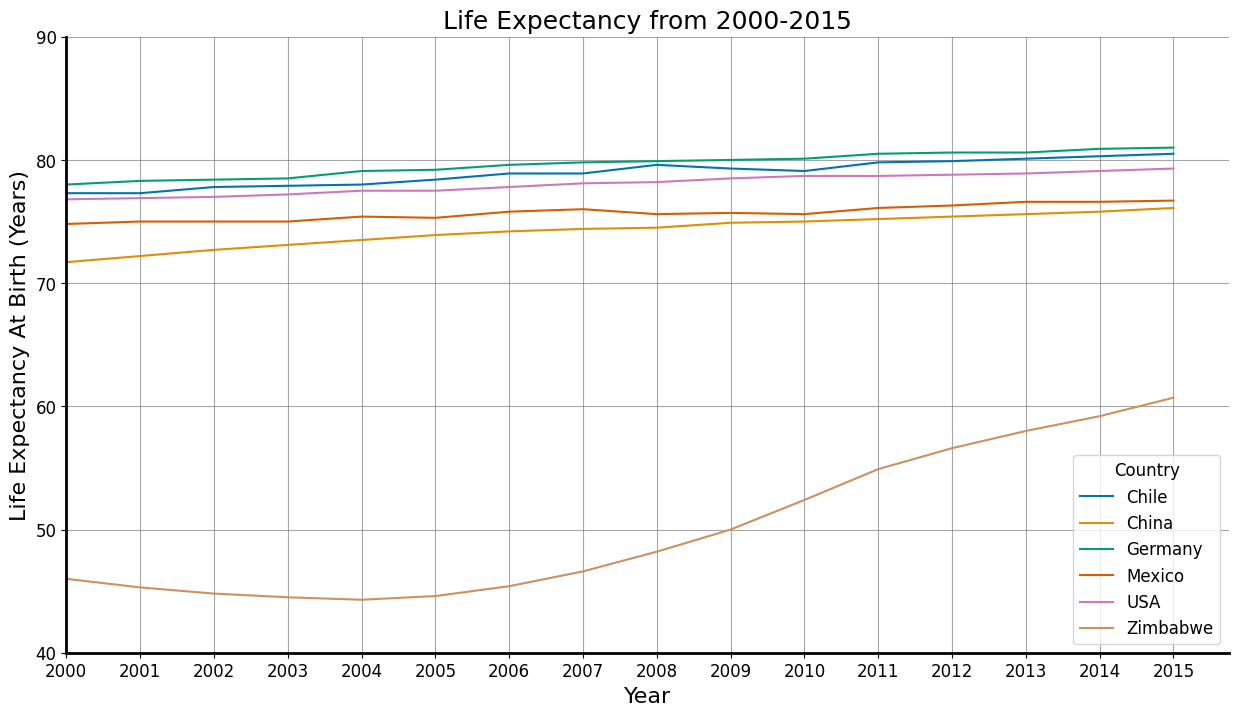

In [96]:
#Change in LEB
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(ax=ax,
             x = "year_date",
             y = "LEB",
             data = df,
             hue = "Country",
             palette= "colorblind")

ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.set_ylim(40, 90)
ax.set_xlim(df.year_date.min())
    
plt.title("Life Expectancy from 2000-2015", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Life Expectancy At Birth (Years)", fontsize=16)

ax.grid(alpha = 0.7, color='gray')

for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(2)

    sns.despine(ax=ax, offset=0)

plt.show()

* From this chart we can see again that Zimbabwe's life expectancy is significantly lower than the other observed countries in this dataset. 
* However, Zimbabwe also presents with the largest growth in life expectancy with an increase of over 10 years while the other countries saw in increase of only a handful of years on average.
* Below I will calculate the actual yearly rate of LEB increase for each country to better understand the trends seen on this graph.

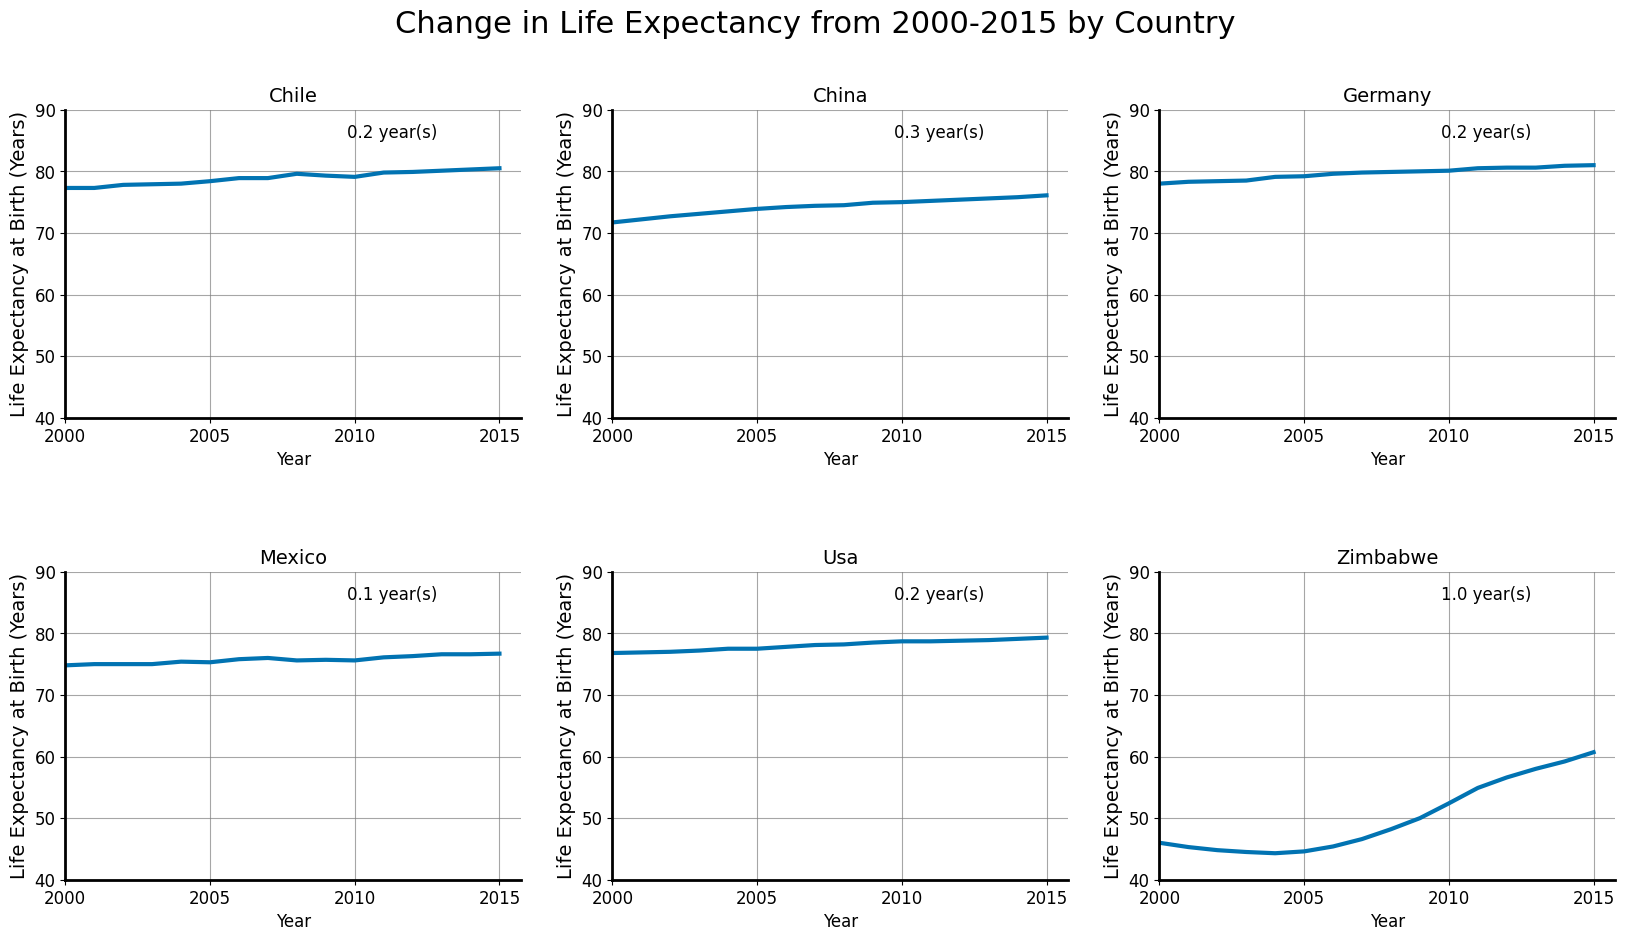

In [97]:
numrows = 2
numcols = 3
countries = list(df.Country.unique())

#Calculating the rate of change in life expectancy per year
LEB_rate = {}
for country in countries:
    init_LEB = df.LEB.loc[(df.Country == country) & (df.Year == 2000)].values[0]
    final_LEB = df.LEB.loc[(df.Country == country) & (df.Year == 2015)].values[0]

    LEB_rate[country] = round((final_LEB - init_LEB) / 15, 1)

fig, axes = plt.subplots(numrows, numcols, figsize= (20, 10))
plt.rcParams['font.size'] = 12
fig.suptitle(f"Change in Life Expectancy from 2000-2015 by Country", fontsize= 22)

for index, country in enumerate(countries):
    ax = plt.subplot(numrows, numcols, index+1)
    label = f"{LEB_rate[country]} year(s)"

    sns.lineplot(ax= ax, 
             x= "year_date",
             y= "LEB",
             data = df[df.Country == country],
             color = sns.color_palette("colorblind")[0],
             linewidth = 3)

    ax.xaxis.set_major_locator(mdates.YearLocator(base= 5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    ax.grid(alpha= 0.7, color= 'gray')
    ax.set_xlabel(f"Year", fontsize= 12)
    ax.set_ylabel(f"Life Expectancy at Birth (Years)", fontsize= 14)
    plt.title(f"{country.title()}", fontsize= 14)

    ax.set_ylim(40, 90)
    ax.set_xlim(df.year_date.min())

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(2)

    sns.despine(ax=ax, offset=0)

    ax.annotate(label, (mdates.date2num(df.year_date[9]), 82), xytext=(15, 15), 
            textcoords='offset points')
    
plt.subplots_adjust(hspace=0.5)

plt.show()

From this figure we get a better view of the LEB trends.
* Zimbabwe's rate of LEB increase is significantly higher than all other countries. Their LEB grew by 1 year on average every year, while other countries only saw increases in LEB of 0.2 - 0.3 years per year. 
* Mexico's LEB growth was the smallest at 0.1 years.
* Of note, there is a dip in Zimbabwe's LEB just prior to 2005. This is likely due to the **[food crisis](https://press.un.org/en/2002/AFR398.doc.htm)** their country experienced during the early 2000's.
* So far, no noticeable dip in LEB is noticeable during the years of the Great Recession.

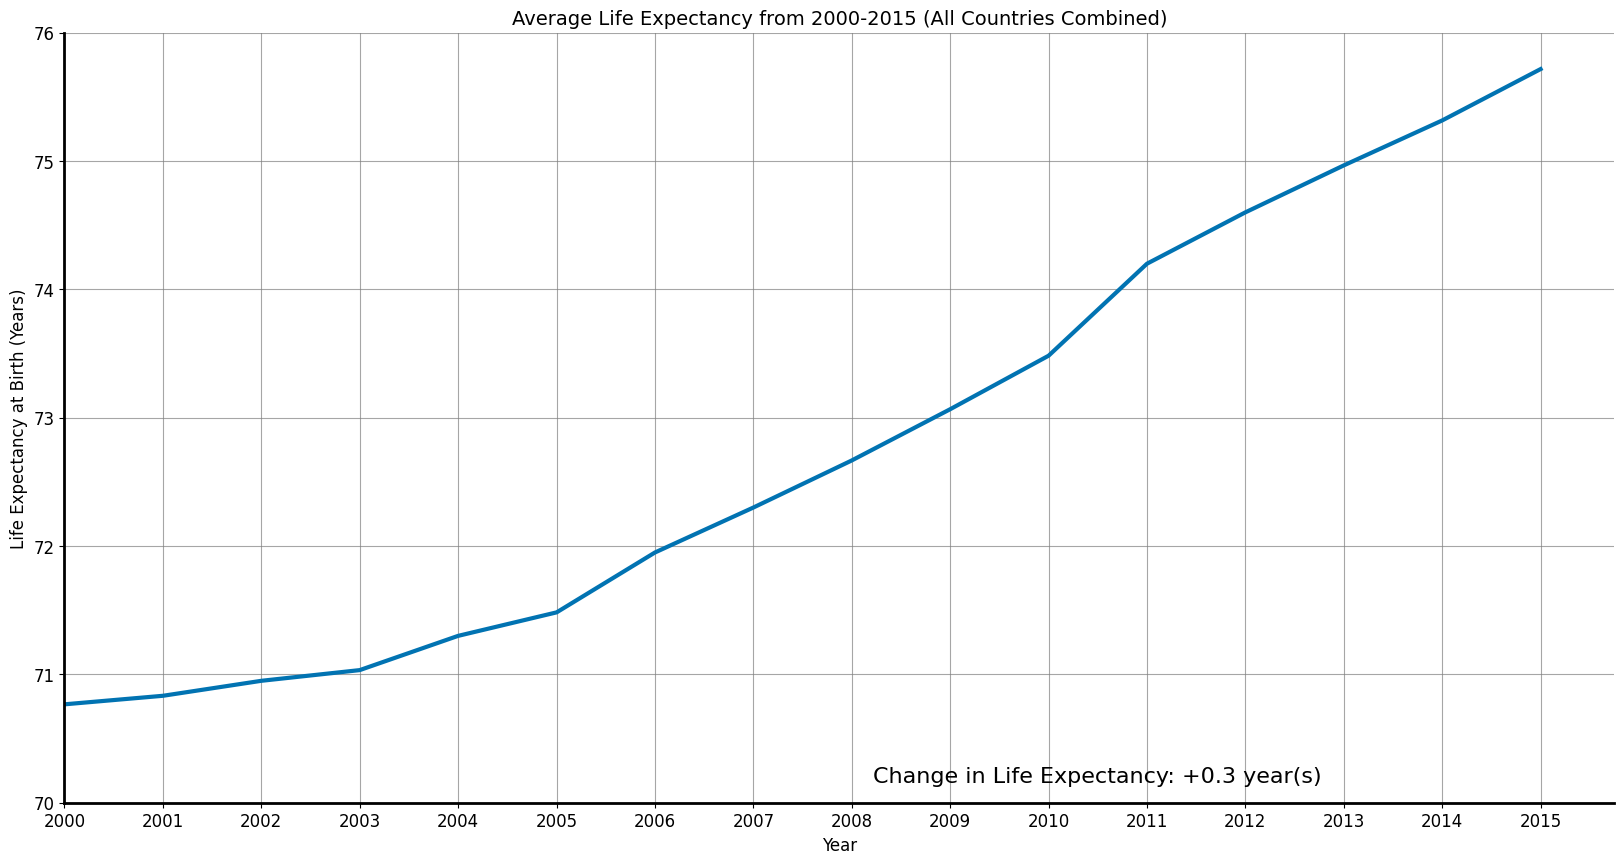

In [98]:
# Rate of Increase in Life Expectancy
init_life = df_group_by_year.LEB.loc[(df_group_by_year.Year == 2000)].values[0]
final_life = df_group_by_year.LEB.loc[(df_group_by_year.Year == 2015)].values[0]

LEB_all = round((final_life - init_life) / 15, 1)
label = f"Change in Life Expectancy: +{LEB_all} year(s)"

fig, ax = plt.subplots(1, 1, figsize= (20, 10))
sns.lineplot(ax = ax, 
        x= "year_date", 
        y= "LEB",
        data= df_group_by_year, 
        color = sns.color_palette("colorblind")[0], 
        linewidth=3)

ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.set_ylim(70, 76)
ax.set_xlim(df.year_date.min())

plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy at Birth (Years)', fontsize=12)
plt.title('Average Life Expectancy from 2000-2015 (All Countries Combined)', fontsize=14)

ax.grid(alpha = 0.7, color='gray')

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

sns.despine(ax=ax, offset=0)

ax.annotate(label, (mdates.date2num(df.year_date[8]), 70), xytext=(15, 15), 
            textcoords='offset points', fontsize=16)

plt.show()




The combined rate of LEB increase for all countries is 0.3 years per year. So although Zimbabwe's rate is much higher, all others are low enough to keep the total average down. This figure is useful, but the previous graphs provide us needed detail and context.

#### 3.3 Change in GDP from 2000 - 2015

Next let's look at GDP, breaking down the distribution, averages, and changes as a whole and for each country.

<Figure size 800x600 with 0 Axes>

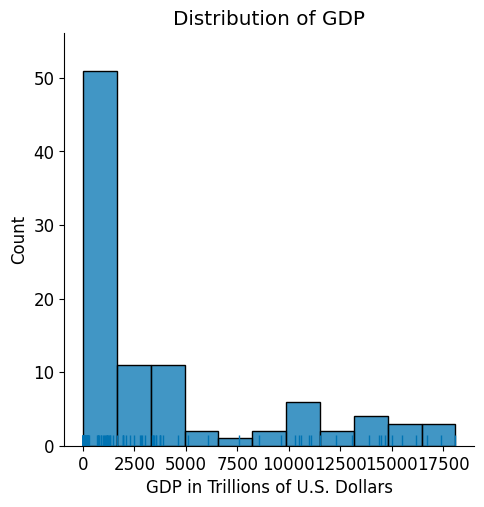

In [99]:
#Looking into the distribution of the GDP
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug = True, kde=False, color = sns.color_palette("colorblind")[0])
plt.title("Distribution of GDP")
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

The distribution graph above is heavily skewed to the right, confirming the earlier analysis. With this in mind, further graphs will be in measured in billions rather than trillions of dollars in order to better capture countries with lower GDP's. As you can see by the graph below, even using billions, Zimbabwe still struggles to appear when compared to the USA. 

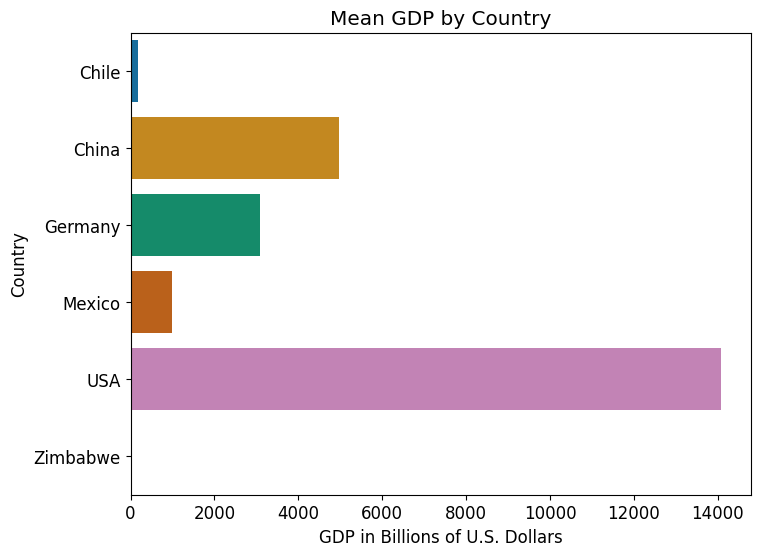

In [100]:
#Mean GDP by Country
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=dfMeans, palette= "colorblind")
plt.title("Mean GDP by Country")
plt.xlabel("GDP in Billions of U.S. Dollars")
plt.show()

This graph further highlights just how vast the difference is between the USA and nearly every other country on the list in regard to GDP. Interestingly enough, this huge difference was not present when analyzing the LEB; our first indicator that the correlation between LEB and GDP has its limits. 

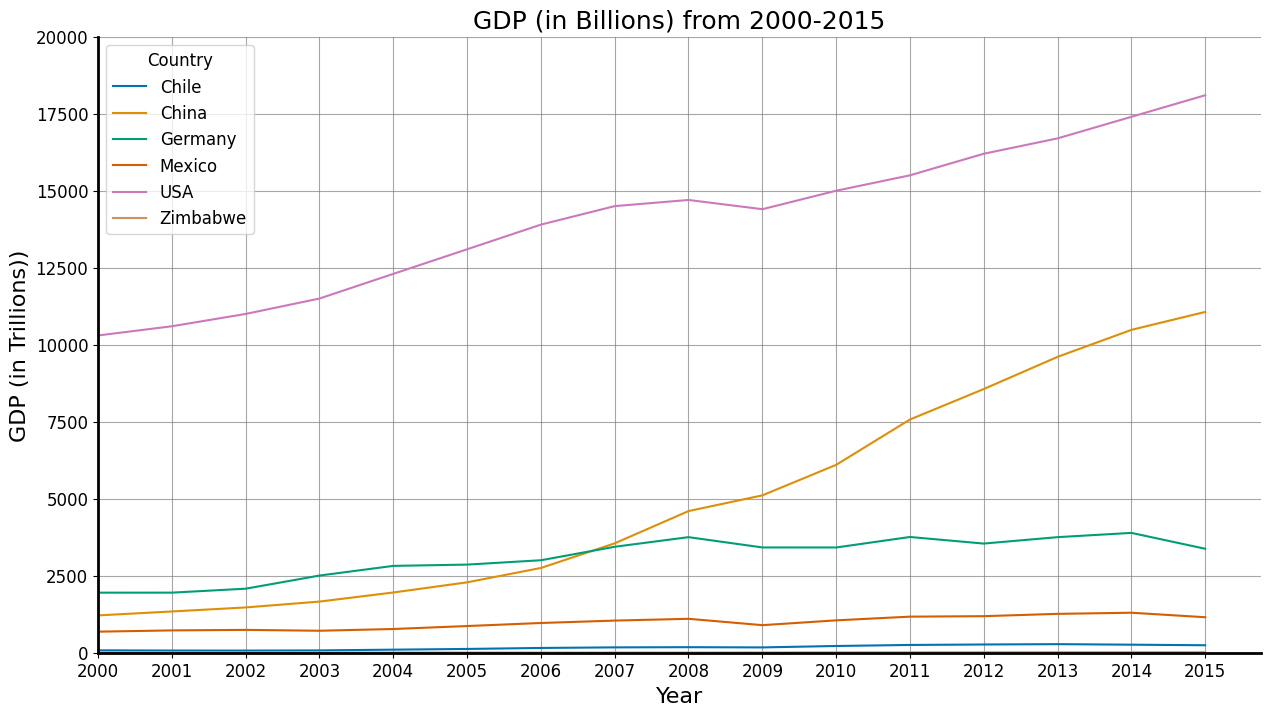

In [101]:
#Change in GDP
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.lineplot(ax=ax,
             x = "year_date",
             y = "GDP",
             data = df,
             hue = "Country",
             palette= "colorblind")

ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.set_ylim(0, 20000)
ax.set_xlim(df.year_date.min())
    
plt.title("GDP (in Billions) from 2000-2015", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("GDP (in Trillions))", fontsize=16)

ax.grid(alpha = 0.7, color='gray')

for spine in ['left', 'bottom']:
    ax.spines[spine].set_linewidth(2)

    sns.despine(ax=ax, offset=0)

plt.show()

Again, we can just barely see Zimbabwe on this graph as it hugs the bottom. If this were in Trillions it would be even harder to spot given how small it's GDP is in comparison to other countries, especially the USA. 

In [102]:
# This function extracts data from FRED json file and converts to a dataframe
def getFREDData(r, col_name):
    temp_json = r.json()
    temp_dict = {"date": [], col_name: []}
    
    for i in range(len(temp_json["observations"])):
        temp_dict["date"].append(temp_json["observations"][i]["date"])
        temp_dict[col_name].append((temp_json["observations"][i]["value"]))
    
    dfGDP = pd.DataFrame.from_dict(temp_dict)
    
    dfGDP[col_name] = df[col_name].replace(".", 0)
    dfGDP[col_name] = df[col_name].apply(pd.to_numeric)
    
    dfGDP.date = pd.to_datetime(df.date) ## Change the date datatype from string to datetime

    return dfGDP

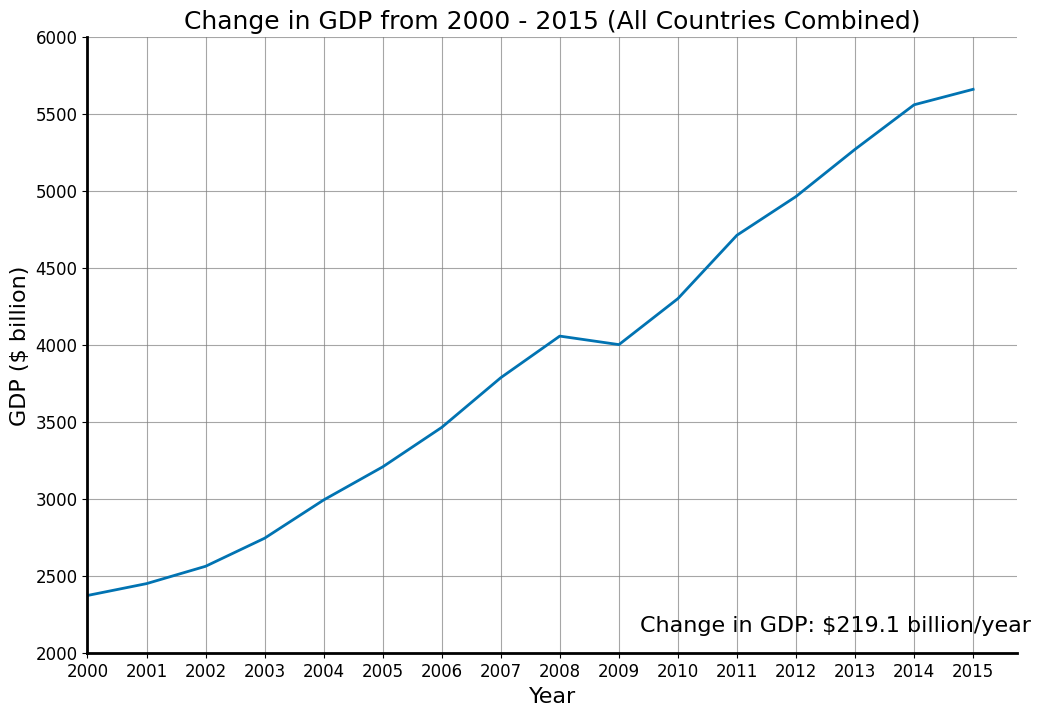

In [103]:
# Rate of Increase in GDP
init_gdp = df_group_by_year.GDP.loc[(df_group_by_year.Year == 2000)].values[0]
final_gdp = df_group_by_year.GDP.loc[(df_group_by_year.Year == 2015)].values[0]

gdp_rate_all = round((final_gdp - init_gdp) / 15, 1)
label = f"Change in GDP: ${gdp_rate_all} billion/year"

## Plot a graph for life expectancy of all countries combined
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.lineplot(ax = ax,
             x = "year_date",
             y = "GDP",
             data = df_group_by_year,
             color = sns.color_palette("colorblind")[0],
             linewidth = 2)

ax.xaxis.set_major_locator(mdates.YearLocator(base=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax.set_ylim(2000, 6000)
ax.set_xlim(df.year_date.min())
    
plt.title("Change in GDP from 2000 - 2015 (All Countries Combined)", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("GDP ($ billion)", fontsize=16)

ax.grid(alpha = 0.7, color='gray')

ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

sns.despine(ax=ax, offset=0)

ax.annotate(label, (mdates.date2num(df.year_date[9]), 2000), xytext=(15, 15), 
            textcoords='offset points', fontsize=16)
plt.show()

When observing the above graphs, one notices a dip in GDP starting at the end of 2007 and ending in 2009. This is due to the *[Great Recession](https://www.federalreservehistory.org/essays/great-recession-of-200709)* that started in December of 2007 following the US mortgage crisis. Below is a more clear representation of each country's GDP and how the recession affected them.

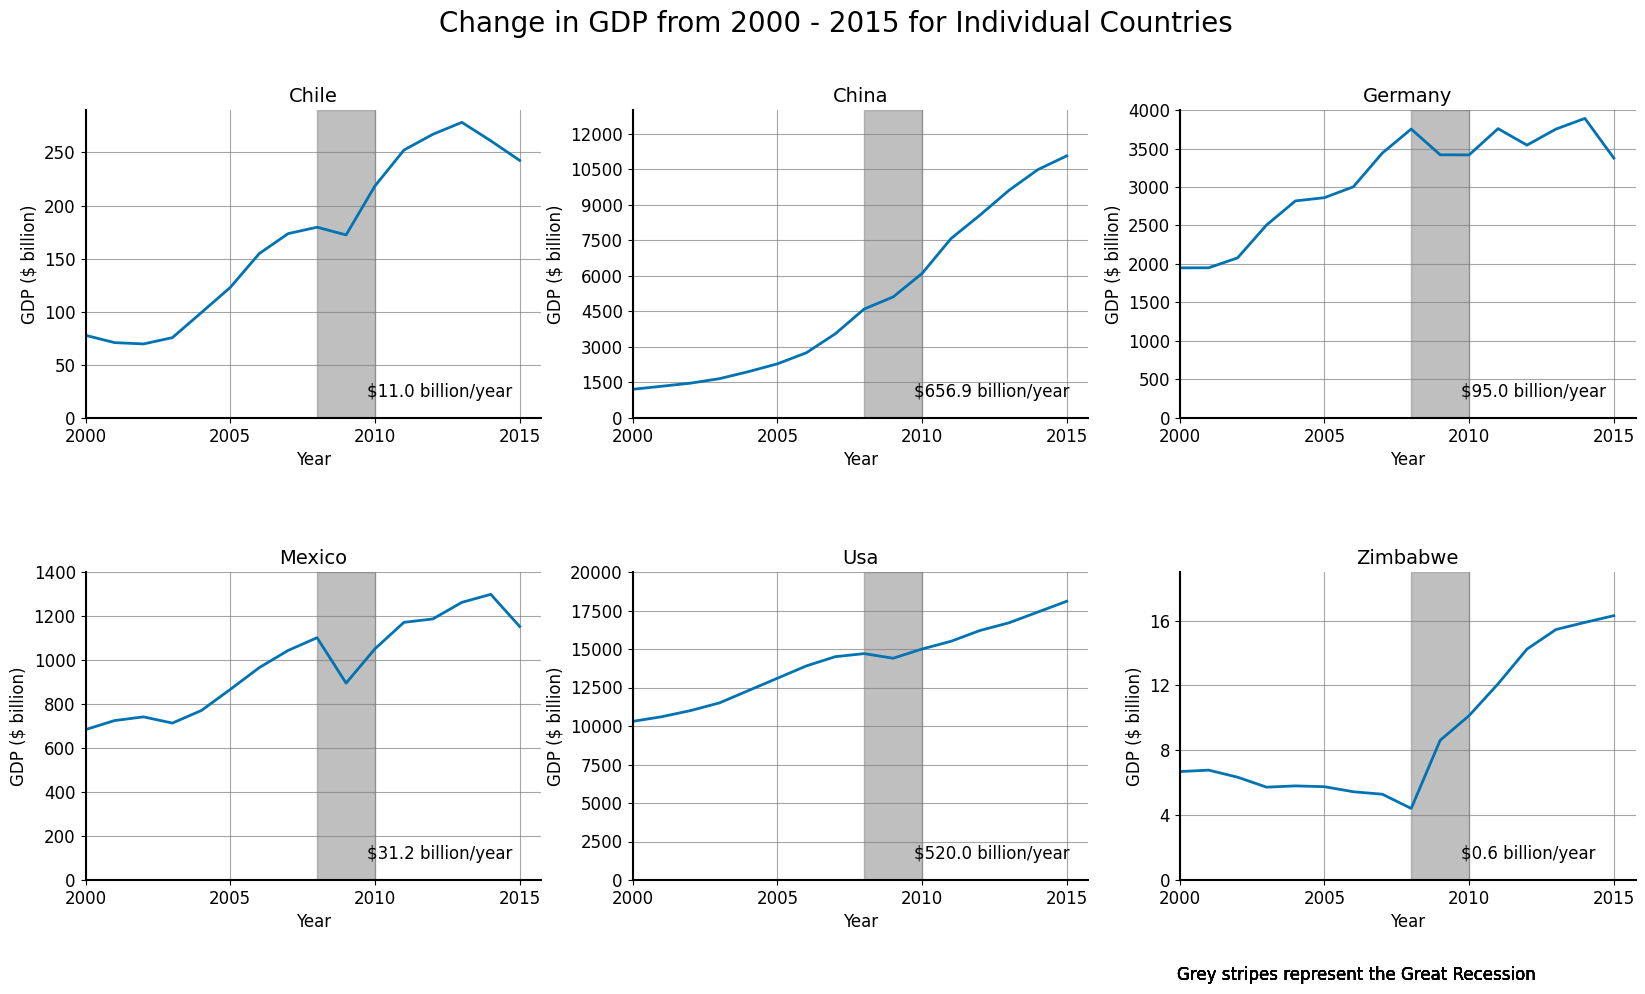

In [104]:
GDP_rate = {}

## Calculate the rate of GDP per year
for country in countries:
    init_gdp = df.GDP.loc[(df.Country == country) & (df.Year == 2000)].values[0]
    final_gdp = df.GDP.loc[(df.Country == country) & (df.Year == 2015)].values[0]
    
    GDP_rate[country] = round((final_gdp - init_gdp) / 15, 1)

nrow = 2
ncol = 3
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 10))
plt.rcParams['font.size'] = 12
fig.suptitle(f"Change in GDP from 2000 - 2015 for Individual Countries",
              fontsize = 20)

for index, country in enumerate(countries):
    ax = plt.subplot(nrow, ncol, index+1)
    label = f"${GDP_rate[country]} billion/year"
    
    y = df.GDP[df.Country == country]
    ymax = math.ceil(y.max())
    ymin = y.min()
    
    n = int(math.log10(ymax))
    num = 10**(n-1) if n >= 4 else 10**(n-1)
    ymax = int(ymax/num)*num + 2*num
    
    sns.lineplot(ax=ax,
                 x = "year_date",
                 y = "GDP",
                 data = df[df.Country == country],
                 color = sns.color_palette("colorblind")[0],
                 linewidth = 2)
    
    ax.xaxis.set_major_locator(mdates.YearLocator(base=5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    
    ax.grid(alpha = 0.7, color='gray')
    ax.set_xlabel(f"Year", fontsize = 12)
    ax.set_ylabel(f"GDP ($ billion)", fontsize = 12)
    plt.title(f"{country.title()}", fontsize = 14)
    
    ax.set_ylim(0, ymax)
    ax.set_xlim(df.year_date.min())
    
    m = n+5
    ax.yaxis.set_major_locator(plt.MaxNLocator(m))
        
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    sns.despine(ax=ax, offset=0)
    
    ax.annotate(label, (mdates.date2num(df.year_date[9]), 0), xytext=(15, 15), 
            textcoords='offset points')
 # Add gray stripe from end of 2007 to 2009 for Recession
    ax.axvspan(pd.to_datetime("2007-12-31"), pd.to_datetime("2009-12-31"), color='grey', alpha=0.5)
    txt="Grey stripes represent the Great Recession"
    plt.figtext(0.85, 0.01, txt, wrap=True, horizontalalignment='right', fontsize=12) 

plt.subplots_adjust(hspace=0.5)
plt.show()

As easily seen by the above figures, the recession caused a dip in the GDP growth rate for nearly every country. 
* Of particular interest is how much more severely the recession impacted Mexico and Germany when compared to the USA, despite the recession being caused by the US mortgage crisis. Particularly in the case of Mexico, this demonstrates how dependent other countries were/are on the US economy. However, an exception to this can be seen in China, whose GDP continued to grow. 
* Also of note is how the recession coincides with a rise in the GDP growth rate for Zimbabwe. However, as we will see soon, this is the result of hyper-inflation in 2008 rather than an economic boom.

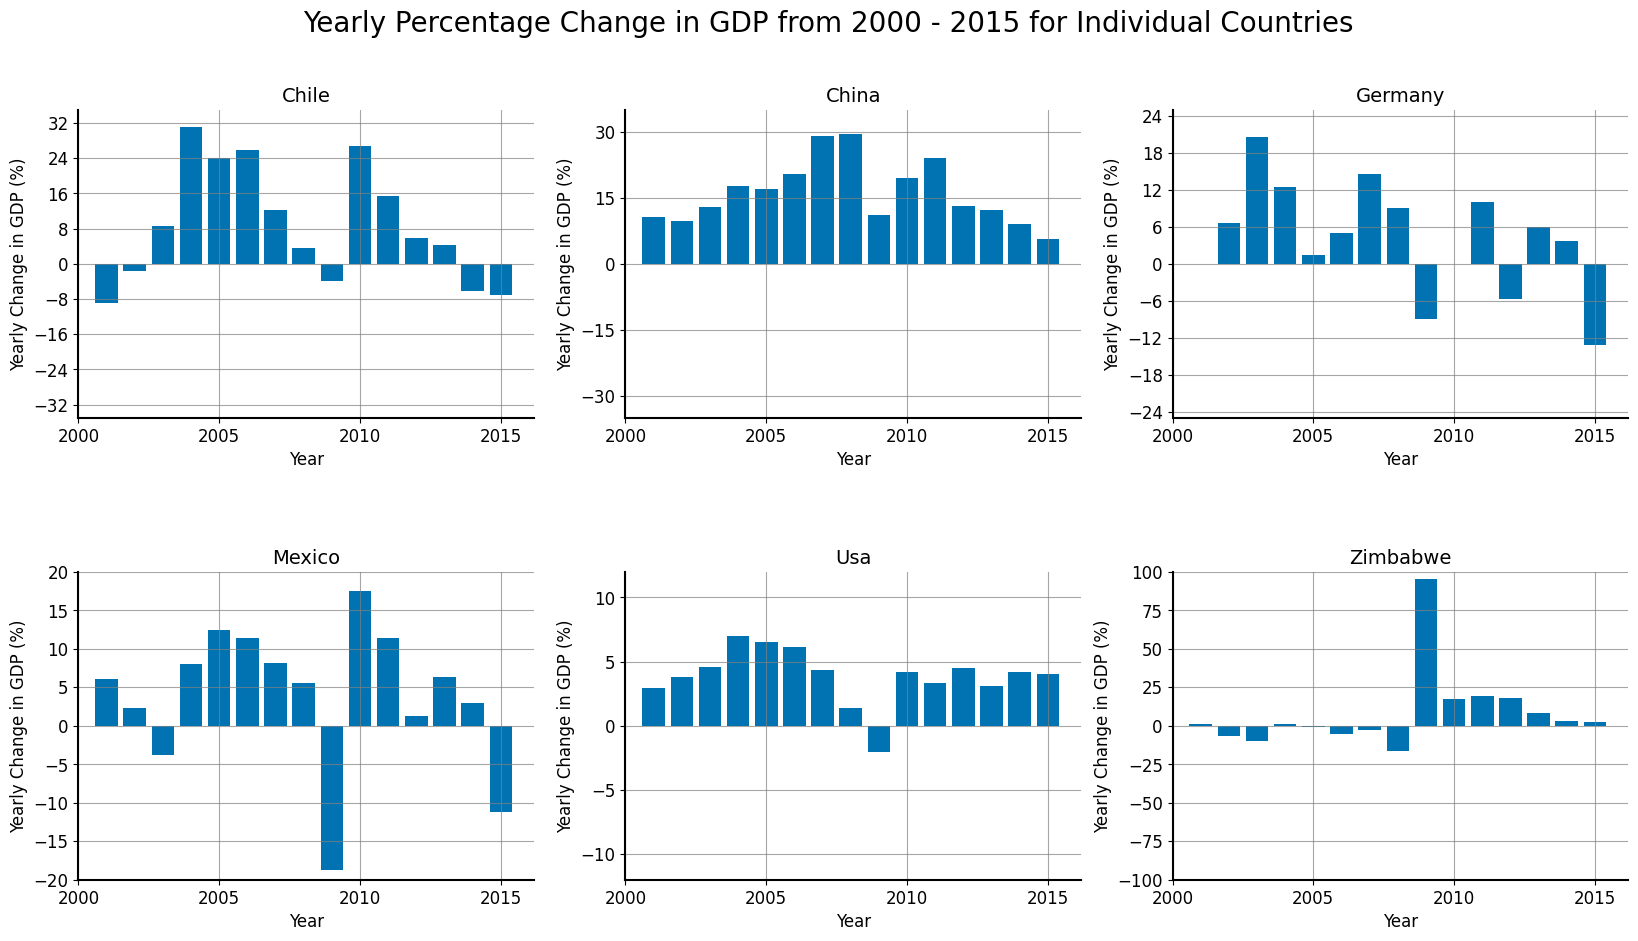

In [105]:
nrow = 2
ncol = 3
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 10))
plt.rcParams['font.size'] = 12
fig.suptitle(f"Yearly Percentage Change in GDP from 2000 - 2015 for Individual Countries", fontsize=20)

for index, country in enumerate(countries):
    ax = plt.subplot(nrow, ncol, index+1)

    df_temp = df[df.Country == country].copy()  # Make a copy of the dataframe

    df_temp["GDP_change"] = df_temp["GDP"].pct_change().fillna(0) * 100
    df_temp.set_index("year_date", inplace=True)

    y = df_temp["GDP_change"]

    ymax = math.ceil(y.max())
    ymin = y.min()

    n = int(math.log10(ymax))
    num = 10**n
    ymax = int(ymax / num) * num + 5 if country not in ["Mexico", "Zimbabwe"] else int(ymax / num) * num + 10

    ax.bar(x="Year", 
           height="GDP_change", 
           data=df_temp, 
           color = sns.color_palette("colorblind")[0])

    ax.grid(alpha=0.7, color='gray')
    ax.set_xlabel(f"Year", fontsize=12)
    ax.set_ylabel(f"Yearly Change in GDP (%)", fontsize=12)
    plt.title(f"{country.title()}", fontsize=14)

    ax.set_ylim(-ymax, ymax)
    ax.set_xlim(df_temp.Year.min())

    m = 9 if country not in ["USA", "China"] else 5
    ax.yaxis.set_major_locator(plt.MaxNLocator(m))

    m = 4
    ax.xaxis.set_major_locator(plt.MaxNLocator(m))

    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    sns.despine(ax=ax, offset=0)

plt.subplots_adjust(hspace=0.5)
plt.show()


* In the above figures we can better see how Zimbabwe's GDP surge was temporary due to the country's **[hyperinflation strategy](https://www.theguardian.com/world/2008/feb/22/zimbabwe)** in 2008.  
* This figure further highlights just how negatively impacted Mexico was from the recesssion, with their GDP growth rate falling by nearly 20%.  
* Although China still experienced growth, the above figure demonstrates that their growth was slowed by the recession.   

### 3.4 Correlation between GDP and Life Expectancy

In [106]:
#A simple way to write the scatter plot. But values are in Trillions and hence Zimbabwe's change is not shown well.
#sns.scatterplot(x=df.LEB, y=df.GDP, hue=df.Country, palette= 'colorblind').legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

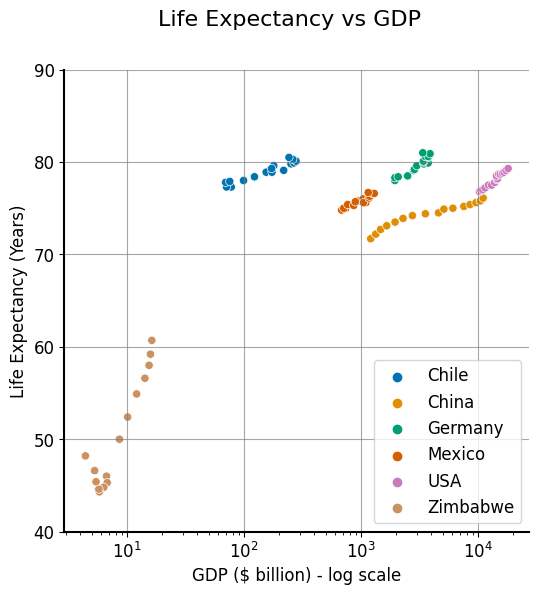

In [107]:
#Plot a scatterplot for life expectancy and gdp of all countries combined
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

plt.rcParams['font.size'] = 12
fig.suptitle(f"Life Expectancy vs GDP",
              fontsize = 16)

sns.scatterplot(ax=ax,
                x="GDP",
                y="LEB",
                data=df,
                hue="Country",
                palette= "colorblind")

ax.set_xscale('log')
ax.set_ylim(40, 90)

ax.grid(alpha = 0.7, color='gray')
ax.set_xlabel(f"GDP ($ billion) - log scale", fontsize = 12)
ax.set_ylabel(f"Life Expectancy (Years)", fontsize = 12)

ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

sns.despine(ax=ax, offset=0)

plt.legend(loc = "lower right")
plt.show()

* Other than Zimbabwe there does seem to be a linear relationship on a by-country-level between GDP and LEB.
* However, GDP is clearly not the only or necessarily even most important factor to an increase in LEB. Countries with smaller GDP's such as Chile and Germany still have a higher LEB than the USA, depsite us knowing that the US has a significantly larger GDP.
* Although there is a correlation present, this data shows that the GDP is only 1 in a variety of possible factors influencing a country's life expectancy.

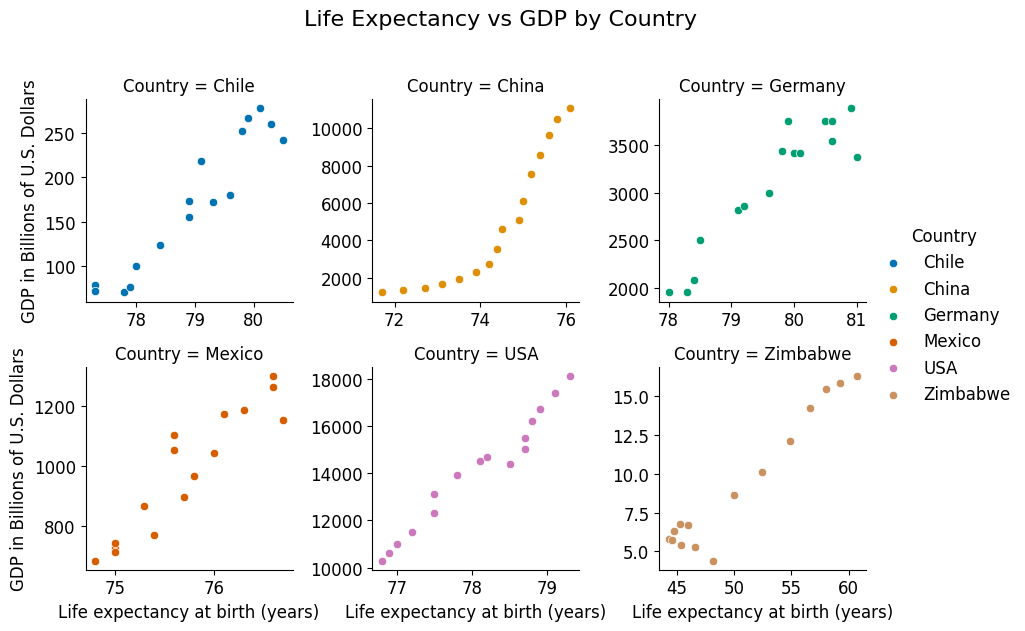

In [108]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", palette= "colorblind", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEB", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Billions of U.S. Dollars"))
graph.fig.suptitle("Life Expectancy vs GDP by Country", fontsize=16, y=1.05)
graph.fig.subplots_adjust(top=0.9)

* Again, we see a relatively linear relationship when giving each country more space than in the previous figure.
* Although these figures are useful, they are a little confusing and difficult to interpret. Below is better representation of the relationship between the GDP and Life Expectancy.

In [109]:
#Overall Pearson Correlation
overall_corr = round(np.corrcoef(df.LEB, df.GDP)[0,1], 2)
print("The overall Pearson Correlation is:", overall_corr)

The overall Pearson Correlation is: 0.34


In [110]:
corr = {}

##Calculating the Pearson correlation coefficient for each country
for country in countries:
    c = round(np.corrcoef(df.LEB[df.Country == country], 
                          df.GDP[df.Country == country])[0,1], 2)
    corr[country] = c

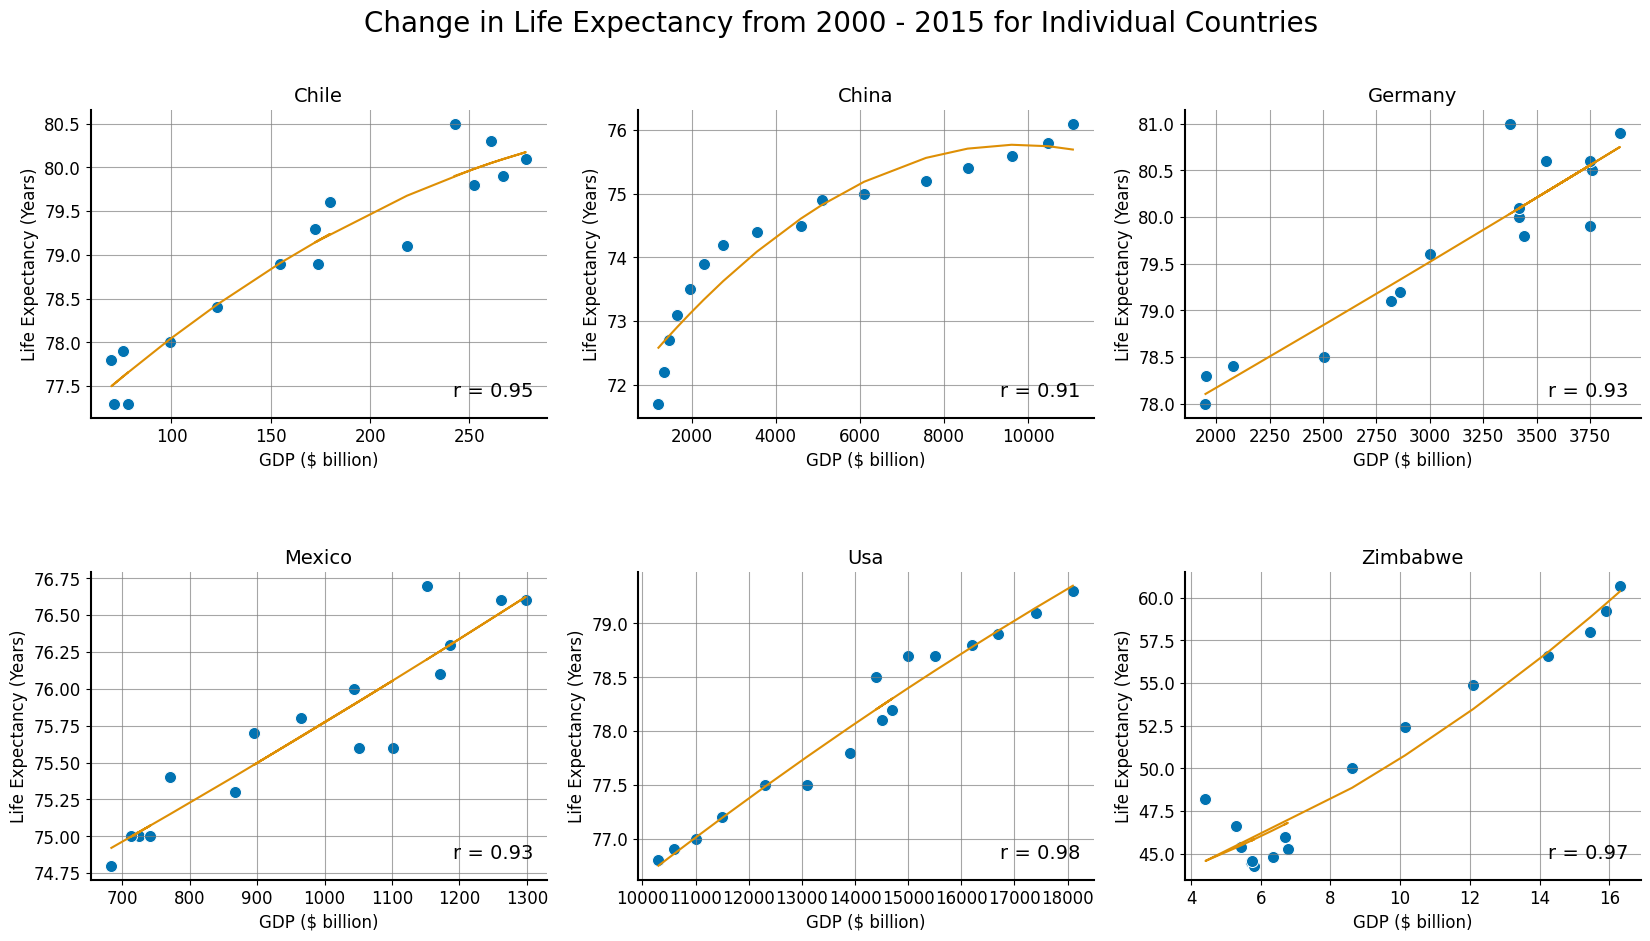

In [111]:
#Plot life expectancy over time for individual countries
nrow = 2
ncol = 3
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 10))
plt.rcParams['font.size'] = 12
fig.suptitle(f"Change in Life Expectancy from 2000 - 2015 for Individual Countries",
              fontsize = 20)

for index, country in enumerate(countries):
    ax = plt.subplot(nrow, ncol, index+1)
    x = df.GDP[df.Country == country]
    y = df.LEB[df.Country == country]
    
    sns.scatterplot(ax=ax,
                    x = "GDP",
                    y = "LEB",
                    data = df[df.Country == country],
                    color = sns.color_palette("colorblind")[0],
                    s = 75)
    
    label = f"r = {corr[country]}"
    
    ax.grid(alpha = 0.7, color='gray')
    ax.set_xlabel(f"GDP ($ billion)", fontsize = 12)
    ax.set_ylabel(f"Life Expectancy (Years)", fontsize = 12)
    plt.title(f"{country.title()}", fontsize = 14)
    
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    
    sns.despine(ax=ax, offset=0)
    
    z = np.polyfit(x, y, 2)
    p = np.poly1d(z)
    plt.plot(x, p(x), color = sns.color_palette("colorblind")[1])
    
    ax.annotate(label, (0.75, 0.0), xytext = (15,15), xycoords='axes fraction', 
                textcoords='offset points', fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.show()

With these graphs we can much more easily see the correlation between Life Expectancy and a Country's GDP. Some things to note while reviewing this data:  
  
* Although there is a strong positive correlation between a country's GDP and LEB, this does not necessarily mean that an increased GDP is *causes* an increase in life expectancy.  
* Zimbabwe has some clear outliers. These are likely due to outside events such as the hyperinflation of 2008 and their during the early 2000's.  
* Again, although most countries have a relatively linear correlation between GDP and LEB, China's is non-linear. This further hints towards other factors having an impact on life expectancy such as improved health access, sanitation, etc. (not measured in this dataset).
* Correlation does not mean causation and the relationships seen here do not provide a strong enough argument that an increase in GDP is a direct cause for an increase in a country's life expectancy. 

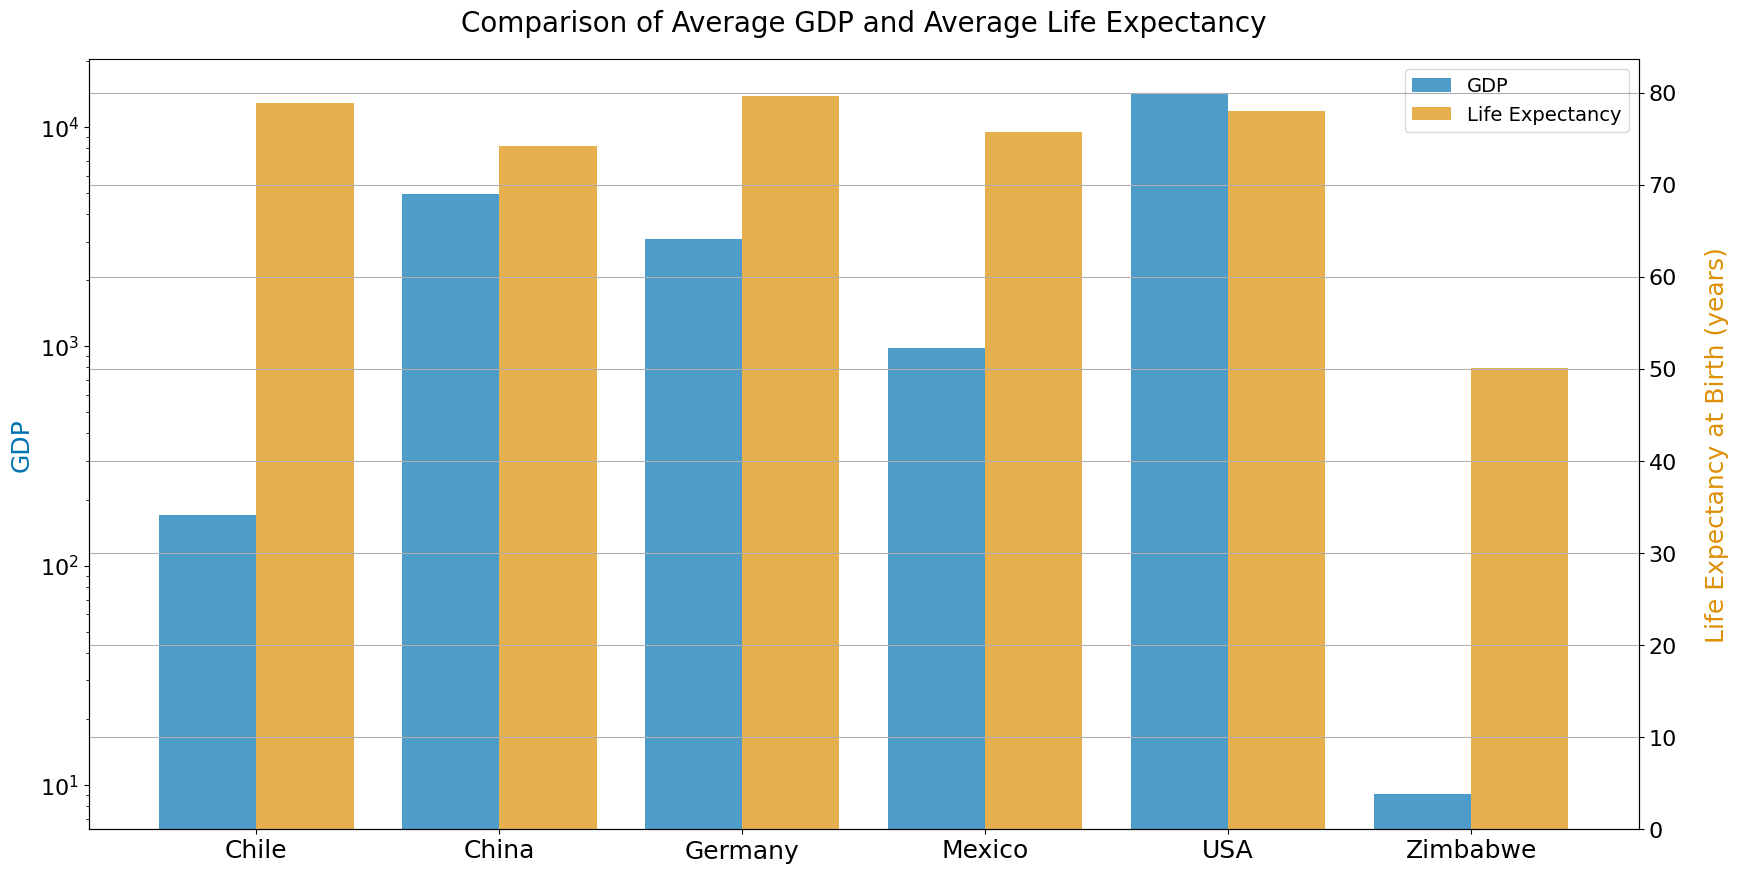

In [112]:
# Average Life & GDP Side-by-Side for Countries 
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

color = sns.color_palette("colorblind")[0]
plot1 = ax1.bar(df_group_by_country.index, df_group_by_country.GDP,
                align='edge', width=-0.4,
                label = "GDP", color=color, alpha=0.7)
ax1.set_yscale('log')

plt.title("Comparison of Average GDP and Average Life Expectancy", fontsize =20, pad = 20)

plt.yticks(fontsize=16)
plt.xticks(fontsize = 18)
plt.ylabel("GDP", fontsize = 18, color = color)

ax2 = ax1.twinx()

color = sns.color_palette("colorblind")[1]
plot2 = ax2.bar(df_group_by_country.index, df_group_by_country.LEB,
                align='edge', width=0.4,
                label = "Life Expectancy", color=color, alpha=0.7)

plt.ylabel(f"Life Expectancy at Birth (years)", fontsize = 18, color = color, labelpad=20)
plt.yticks(fontsize=16)

plt.grid(axis = 'y')
ax2.spines['top'].set_visible(False)

# Combine the plots
plots = plot1 + plot2
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=1, fontsize=14)
plt.show()

* As one can see, a country's GDP only improves the life expectancy to a certain degree. There comes a point when an increase in GDP seems to have minimal impact on LEB and other outside factors start having a greater influence.  
* Despite having the highest GDP, the USA's lie expectancy falls short of both Germany and Chile - countries with lower GDP's. This further reinforces the point that GDP only directly impacts LEB to a certain point.  
* Zimbabwe in-turn, seems to fall below this point as they have both the lowest life expectancy and lowest GDP.  
* The average LEB is between 70-80 years.

In [113]:
df_group_by_country_sort = df_group_by_country.sort_values(by=['GDP'], ascending=False)

countries = list(df_group_by_country_sort.index)
LEB_GDP_rate = {}

# Calculate LEB rate per increase in GDP
for country in countries:
    value = LEB_rate[country] / GDP_rate[country]
    LEB_GDP_rate[country] = float("%.2g" % value)

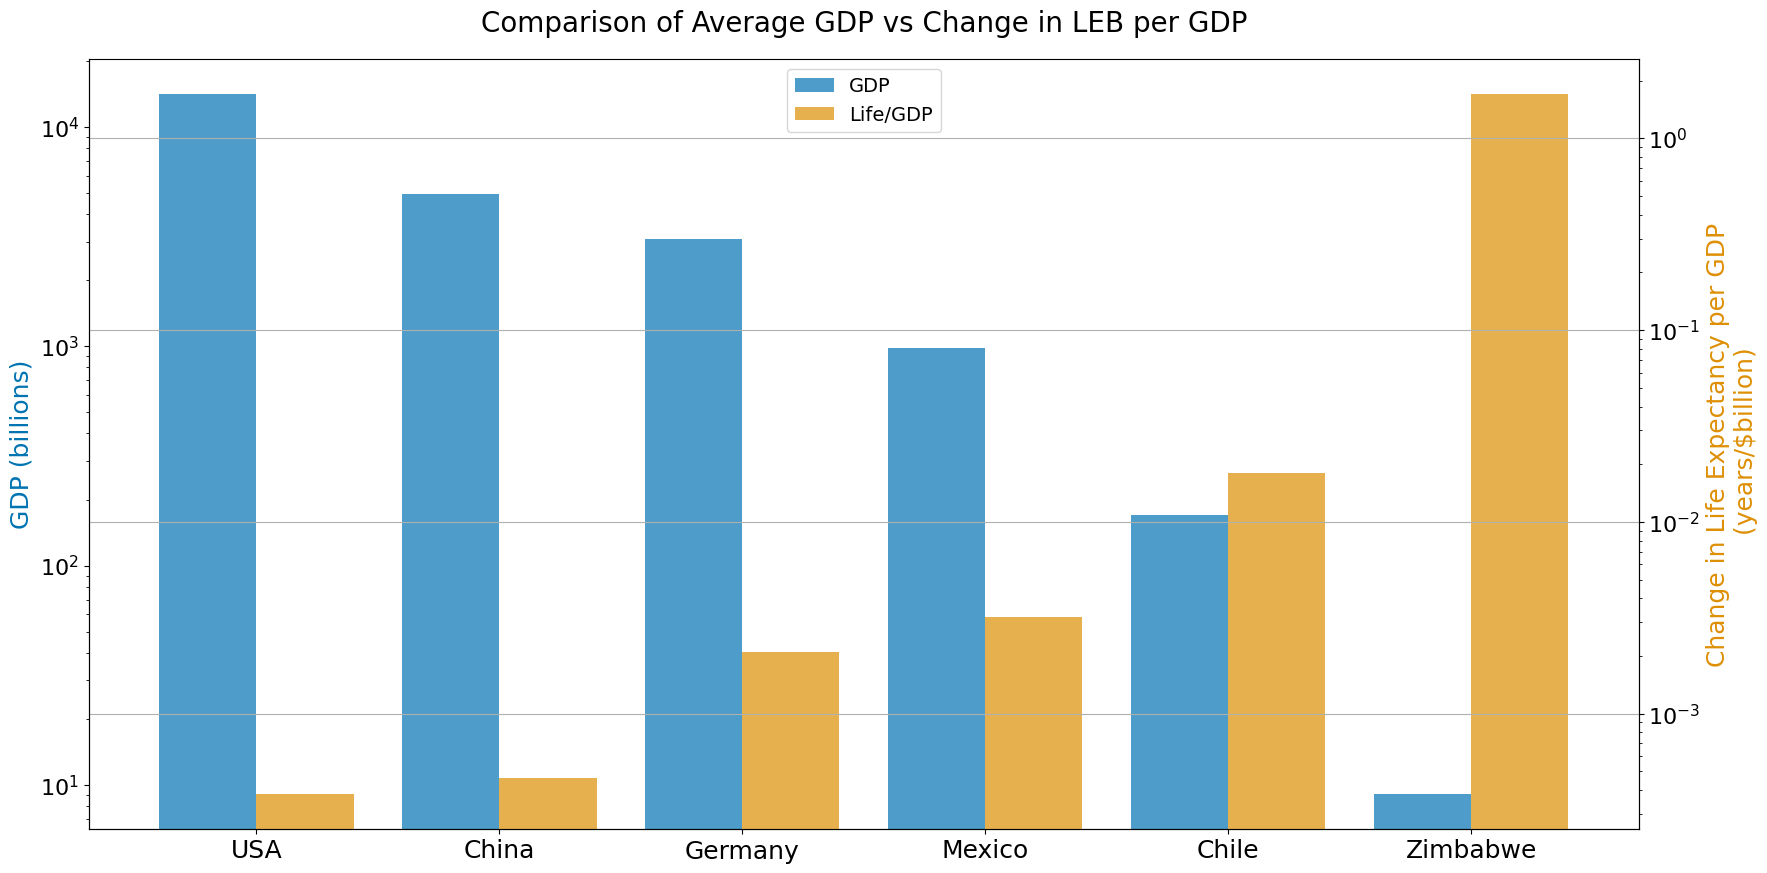

In [114]:
#Plot a comparison of average GDP to change in LEB per change in GDP
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

color = sns.color_palette("colorblind")[0]
plot1 = ax1.bar(countries, df_group_by_country_sort.GDP,
                align='edge', width=-0.4,
                label = "GDP", color=color, alpha=0.7)
ax1.set_yscale('log')

plt.title("Comparison of Average GDP vs Change in LEB per GDP", fontsize =20, pad = 20)

plt.yticks(fontsize=16)
plt.xticks(fontsize = 18)
plt.ylabel("GDP (billions)", fontsize = 18, color = color)

ax2 = ax1.twinx()

color = sns.color_palette("colorblind")[1]
plot2 = ax2.bar(countries, LEB_GDP_rate.values(),
                align='edge', width=0.4,
                label = "Life/GDP", color=color, alpha=0.7)

ax2.set_yscale('log')
plt.ylabel(f"Change in Life Expectancy per GDP\n (years/$billion)", fontsize = 18, color = color)
plt.yticks(fontsize=16)

plt.grid(axis = 'y')
ax2.spines['top'].set_visible(False)

# Combine the plots
plots = plot1 + plot2
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=9, fontsize=14)
plt.show()

* This figure clearly shows that GDP growth does not impact all countries similarly.  
* Again, this graph reinforces the conclusion that once a country's GDP reaches a certain level, that country's life expectancy is no longer strongly influenced by GDP as seen by the negative correlation. Instead, other factors such as healthcare access, cultural norms, infastructure, sanitation, etc. have a larger impact.  
* The countries with the strongest GDP's see the smallest increase in LEB when their GDP increases.  
* Countries with lower GDP's see the highest increase in LEB, as most clearly seen by Zimbabwe.

### 4 Conclusion  
  
* For all observed countries aside from Zimbabwe, the average life expectancy is between 70-80 years. Zimbabwe had the lowest LEB at around 50 years (again, they did experience a food crisis in the early 2000's which may have impacted these numbers)  

* Zimbabwe had the lowest life expectancy, but the highest increase in LEB (1 year higher LEB per year). The other 5 countries in this study had an average increase in LEB of about 0.3 years per year.  

* The GDP increased between 2000 - 2015 for all observed countries at an average rate of $219 billion per year. However, most countries presented with negative growth during the 2007 recession.

* Although at first there seemed to be a strong positive correlation between GDP and LEB, further analysis of the data illuminated the truth: That while GDP contributes to an increase in LEB to a certain degree, there are likely other outside factors (not seen in the data) that contribute to the increase in life expectancy to a greater extent, especially after a certain economic level.

* There is a negative correlation between the rate of increase in GDP and the rate increase in LEB in relation to the size of the country's economy. The smaller the economy, the larger the contribution of GDP to the increase in life expectancy, and vice versa.  